In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
import os.path
import astropy.table
import astropy.io.fits as fits
import numpy as np
from copy import deepcopy
import random
from astropy.table import Table

In [105]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
AEGIS = '/Users/Ismael/aegis/WeakLensingDeblending/'
os.chdir(AEGIS)

In [4]:
import astropy.io.fits
name = 'tutorial'
hdus = astropy.io.fits.open(name+'.fits')
del hdus[2:]
hdus.writeto(name+'_trimmed.fits')
hdus.close()

IOError: File 'tutorial_trimmed.fits' already exists.

In [107]:
from PIL import Image 
image_file = Image.open("display1.png") # open colour image
image_file = image_file.convert('L') # convert image to black and white
image_file.save('result.png')

In [103]:
image_file.convert?

In [116]:
import matplotlib.image as img
pic = img.imread('result.png')
pic

array([[ 0.98039216,  0.98039216,  0.98039216, ...,  0.94509804,
         0.93725491,  0.92941177],
       [ 0.98039216,  0.98039216,  0.98039216, ...,  0.95686275,
         0.94901961,  0.93725491],
       [ 0.98039216,  0.95294118,  0.87058824, ...,  0.98039216,
         0.96078432,  0.94901961],
       ..., 
       [ 0.60000002,  0.68235296,  0.81176472, ...,  0.98039216,
         0.98039216,  0.98039216],
       [ 0.39215687,  0.50588238,  0.66666669, ...,  0.98039216,
         0.98039216,  0.98039216],
       [ 0.25098041,  0.37254903,  0.57254905, ...,  0.98039216,
         0.98039216,  0.98039216]], dtype=float32)

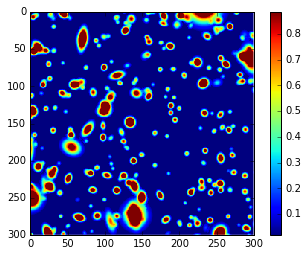

In [113]:
import matplotlib.pyplot as plt 
plt.imshow(1-pic, interpolation='None')
plt.colorbar()

In [114]:
hdu = fits.PrimaryHDU(1-pic)
hdu.writeto('gray.fits')

In [117]:
cat = Table.read('data/intermediate_fits/section001.fits',hdu=0)

KeyboardInterrupt: 

In [ ]:
cat

In [118]:
hdulist = fits.open('data/intermediate_fits/section001.fits')

In [124]:
hdulist[2].header

IndexError: list index out of range

In [173]:
hdulist = fits.open('data/fits/SimOSD1.fits')
hdulist2 = fits.open('data/intermediate_fits/section001.fits')

In [175]:
hdulist[0].header = hdulist2[0].header 

In [177]:
hdulist[0].header['E_HEIGHT'] = 18000
hdulist[0].header['GE_WIDTH'] = 18000
print hdulist[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NSLICES =                   21                                                  
PSF_SIGM=   0.6166557071664878                                                  
PSF_SIGP=   0.6166557071664878                                                  
PSF_HSM =   0.3458685398101807                                                  
URE_TIME=               6900.0                                                  
IGHTNESS=                 20.0                                                  
DIAMETER=    8.359999999999999                                                  
AIRMASS =                  1.2                                                  
RO_POINT=                 41

In [178]:
hdulist.writeto('new.fits')

In [195]:
hdulist_new = fits.open('new.fits')
hdulist_new[0].header
table_new = Table.read('new.fits')

In [196]:
hdulist_new[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NSLICES =                   21                                                  
PSF_SIGM=   0.6166557071664878                                                  
PSF_SIGP=   0.6166557071664878                                                  
PSF_HSM =   0.3458685398101807                                                  
URE_TIME=               6900.0                                                  
IGHTNESS=                 20.0                                                  
DIAMETER=    8.359999999999999                                                  
AIRMASS =                  1.2                                                  
RO_POINT=                 41

In [209]:
table_new['dx'].max()

463.62024

In [169]:
cat = Table.read('data/fits/SimOSD1.fits') 

In [189]:
lsst = fits.open('LSST_i.fits')


In [190]:
lsst[0].header 

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
EXTEND  =                    T                                                  
NSLICES =                    6                                                  
URE_TIME=               6900.0                                                  
IGHTNESS=                 20.0                                                  
DIAMETER=    8.359999999999999                                                  
AIRMASS =                  1.2                                                  
RO_POINT=                 41.5                                                  
VEY_NAME= 'LSST    '        

In [191]:
lsst[0].header  = hdulist_new[0].header
lsst[0].header['E_HEIGHT'] = 4096
lsst[0].header['GE_WIDTH'] = 4096



In [192]:
lsst[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
EXTEND  =                    T                                                  
NSLICES =                   21                                                  
PSF_SIGM=   0.6166557071664878                                                  
PSF_SIGP=   0.6166557071664878                                                  
PSF_HSM =   0.3458685398101807                                                  
URE_TIME=               6900.0                                                  
IGHTNESS=                 20.0                                                  
DIAMETER=    8.3599999999999

In [193]:
lsst.writeto('lsst_new.fits')

In [ ]:
print 'hello'

In [199]:
lsst_new = fits.open('lsst_new.fits')

In [217]:
lsst_new[2].read()

AttributeError: 'ImageHDU' object has no attribute 'read'

In [223]:
import fitsio
fits = fitsio.FITS('data/intermediate_fits/section001.fits')

In [249]:
fits.


  file: data/intermediate_fits/section001.fits
  extension: 3
  type: IMAGE_HDU
  image info:
    data type: f8
    dims: [21,10,9]